# Customer Behavior Analytics & Predictive Insights  
## A Data Mining Project on E-Commerce Transactions

---

## Project Overview

This project aims to analyze customer purchasing behavior and generate predictive insights using a real-world e-commerce dataset. Core data mining techniques applied include:

- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Association Rule Mining for identifying co-purchase patterns  
- Classification algorithms to predict customer behavior  
- Clustering for customer segmentation  
- Evaluation of models and business recommendations

Our objective is to extract actionable insights that can aid decision-making in marketing, inventory management, and customer engagement strategies.

---

## Dataset Introduction

We are using the "Online Retail Dataset" sourced from Kaggle, which contains over 540,000 transactions recorded between 2010 and 2011 by a UK-based online retailer.

### Dataset Highlights:
- Number of records: 541,909  
- Number of features: 8  
- Types of data:  
  - Numerical: Quantity, UnitPrice  
  - Categorical: Country, StockCode, Description  
  - Temporal: InvoiceDate  
  - Customer identification: CustomerID  

This dataset satisfies all the project requirements: it is real-world, sufficiently large, and includes both categorical and numerical attributes necessary for comprehensive data mining.

---

## Group Members

| Student ID | Name                  |
|------------|-----------------------|
| 2022327    | Abdullah Mustafa      |
| 2022360    | Muhammad Bilal        |
| 2022684    | Muhammad Umer Sami    |
| 2022380    | Hamza Motiwala        |

Each member has actively contributed to different components of the analysis and report preparation.

---

**Note:**  
The following code block installs any required Python libraries. Please run it before executing the rest of the notebook to ensure all dependencies are available.


In [ ]:
!pip install pandas numpy
!pip install matplotlib seaborn
!pip install scikit-learn mlxtend plotly


## Data Preprocessing

We begin by loading the dataset from a CSV file into a pandas DataFrame. Initial inspection reveals that some rows are missing a `CustomerID`, which is essential for identifying unique customers — such rows are dropped.

Other preprocessing steps include:
- Removing rows with **negative or zero quantities or unit prices**, as these are likely to represent returns, errors, or irrelevant transactions.
- Converting the `InvoiceDate` column to datetime format for temporal analysis.
- Creating a new feature: `TotalPrice = Quantity × UnitPrice` to represent the value of each transaction.
- Encoding categorical variables such as `Country` using label encoding or one-hot encoding as needed for modeling.

These steps ensure the data is clean, consistent, and ready for analysis and modeling.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
#Reading the dataset
df = pd.read_csv("dataset.csv", encoding="ISO-8859-1")

# Dropping Null
df.dropna(subset=["CustomerID"], inplace=True)

# Fixing Faulty Columns
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Feature Engineering
# 1: TotalSpend
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spend.columns = ['CustomerID', 'TotalSpend']

# 2: High Spender label 
median_spend = customer_spend['TotalSpend'].median()
customer_spend['HighSpender'] = (customer_spend['TotalSpend'] > median_spend).astype(int)

# 3: Frequency (number of purchases per customer)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency')

# 4: Average quantity purchased per customer
avg_quantity = df.groupby('CustomerID')['Quantity'].mean().reset_index(name='AvgQuantity')

# 5: Merge all engineered features
ml_df = customer_spend.merge(frequency, on='CustomerID').merge(avg_quantity, on='CustomerID')

# Label Encoding
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CountryEncoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35


## Exploratory Data Analysis (EDA)

In this step, we explore key patterns and trends in the data:

- **Data Overview:** Summary statistics and missing value checks to understand the dataset structure.
- **Top Countries by Transactions:** Highlighting the most active countries (excluding the UK for clearer international insight).
- **Sales Over Time:** Monthly sales trends reveal seasonality and performance spikes.
- **Popular Products:** Identifying the most purchased items by total quantity.
- **Transaction Value Distribution:** Visualizing how much customers typically spend per invoice.

These insights help us better understand customer behavior before applying data mining techniques.


In [17]:
#Dataset Info
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397884 non-null  object        
 1   StockCode       397884 non-null  object        
 2   Description     397884 non-null  object        
 3   Quantity        397884 non-null  int64         
 4   InvoiceDate     397884 non-null  datetime64[ns]
 5   UnitPrice       397884 non-null  float64       
 6   CustomerID      397884 non-null  float64       
 7   Country         397884 non-null  object        
 8   TotalPrice      397884 non-null  float64       
 9   CountryEncoded  397884 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 31.9+ MB

Summary Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,CountryEncoded
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,32.846998
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,35.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,35.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,35.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,36.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,6.710717


In [16]:
# Missing Value Info
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
TotalPrice        0
CountryEncoded    0
dtype: int64


C:\Users\omega\AppData\Local\Temp\ipykernel_19412\2959952109.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


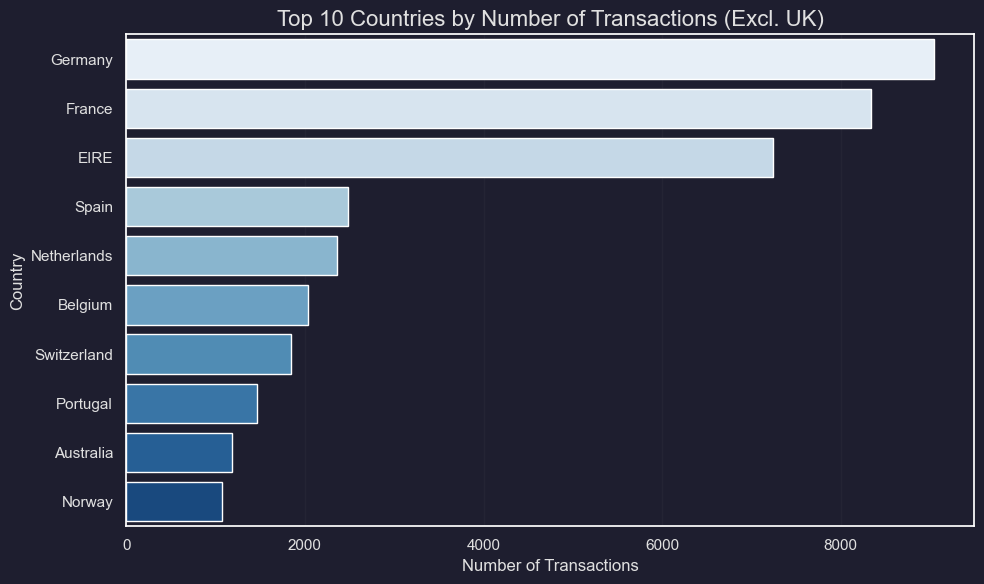

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Custom Breeze Dark-like Theme
background_color = "#1e1e2f"   # Dark slate (like Breeze Dark)
grid_color = "#2e2e3e"
text_color = "#e0e0e0"
highlight_color = "#61afef"   # Cool blue
accent_palette = ["#61afef", "#98c379", "#e06c75", "#c678dd", "#56b6c2"]

# Apply to Matplotlib
mpl.rcParams.update({
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
    "axes.edgecolor": grid_color,
    "axes.labelcolor": text_color,
    "xtick.color": text_color,
    "ytick.color": text_color,
    "text.color": text_color,
    "axes.grid": True,
    "grid.color": grid_color,
    "grid.alpha": 0.4,
    "legend.edgecolor": grid_color,
    "legend.facecolor": "#2b2b3b",
    "savefig.facecolor": background_color
})

# Apply to Seaborn
sns.set_theme(
    style="darkgrid",
    palette=accent_palette,
    rc={
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,
        "grid.color": grid_color
    }
)

top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette="Blues"
)
plt.title('Top 10 Countries by Number of Transactions (Excl. UK)', fontsize=16)
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


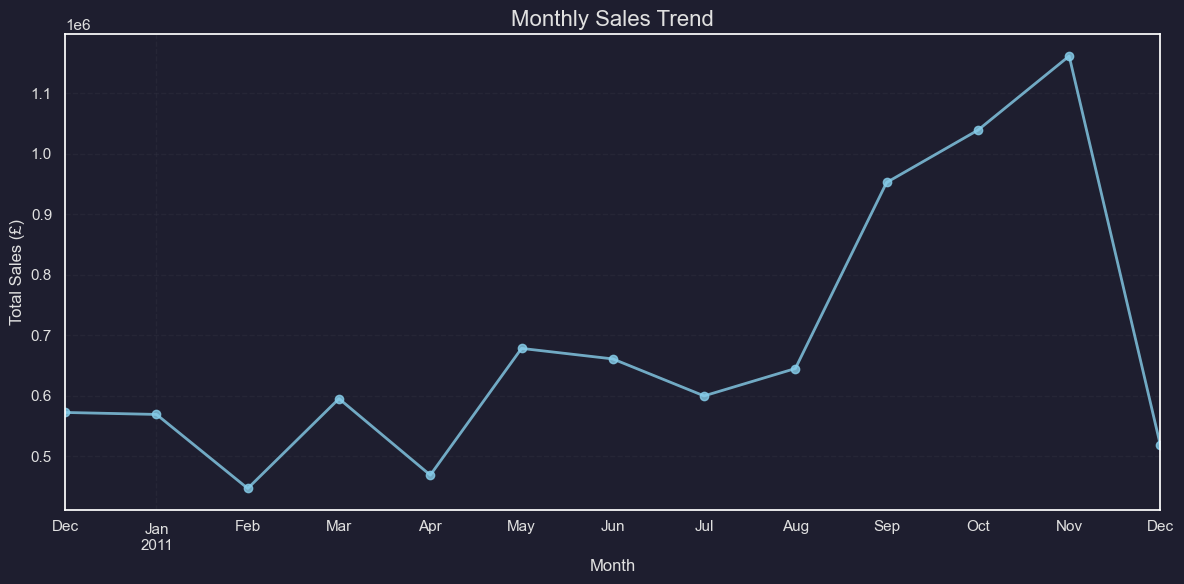

In [57]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(
    kind='line', marker='o', color='skyblue', linewidth=2, alpha=0.8
)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\omega\AppData\Local\Temp\ipykernel_19412\2517571186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='flare')


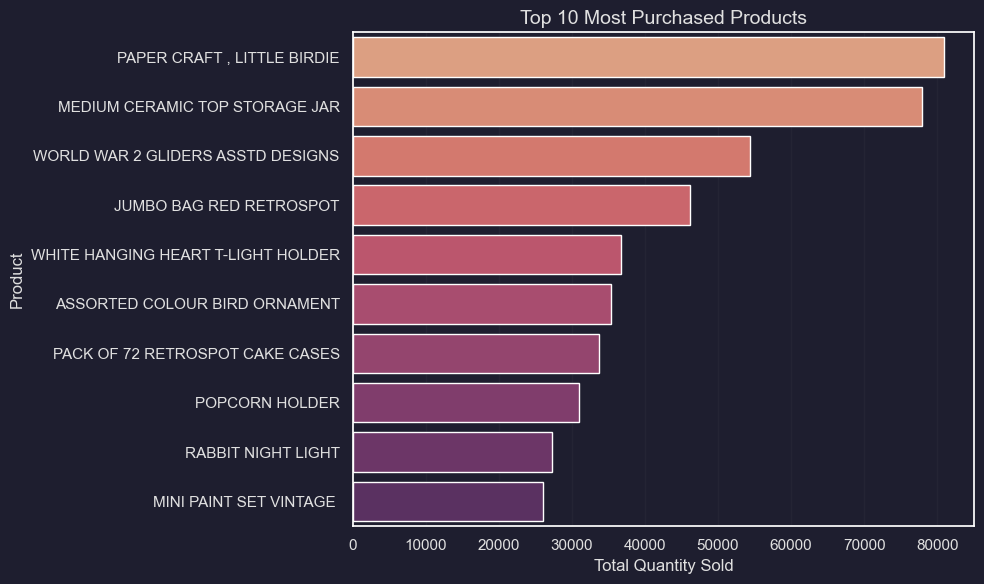

In [58]:
# Top Selling Products
top_items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='flare')
plt.title('Top 10 Most Purchased Products', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

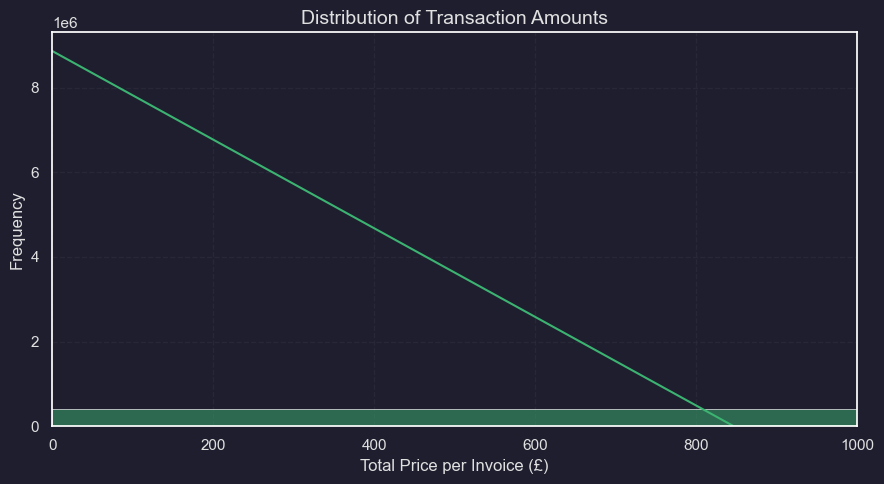

In [59]:
#Transaction distribution
plt.figure(figsize=(9, 5))
sns.histplot(df['TotalPrice'], bins=100, color='mediumseagreen', kde=True)
plt.xlim(0, 1000)  # To prevent extreme outlier distortion
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Total Price per Invoice (£)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Association Rule Mining

In this step, we uncover co-purchase patterns using market basket analysis. By applying the Apriori algorithm, we identify frequent itemsets and generate association rules that reveal which products are commonly bought together. These insights help businesses improve product bundling and cross-selling strategies.


In [18]:
# Step 1: Filter positive transactions from a single country
basket = df[(df['Quantity'] > 0) & (df['Country'] == 'Germany')]

# Step 2: Keep top 50 most frequent items
top_items = basket['Description'].value_counts().nlargest(50).index
basket = basket[basket['Description'].isin(top_items)]

# Step 3: Create basket matrix
basket_grouped = basket.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Step 4: Binary encode
basket_encoded = basket_grouped.applymap(lambda x: 1 if x > 0 else 0)


C:\Users\omega\AppData\Local\Temp\ipykernel_19412\2343574679.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_grouped.applymap(lambda x: 1 if x > 0 else 0)


In [63]:
import pandas as pd
# Step 5: Run Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Step 6: Show top rules
rules_sorted = rules.sort_values(by='lift', ascending=False).head(5)
# Format antecedents and consequents for readability
rules_sorted['antecedents'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_sorted['consequents'] = rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

# Display as a clean styled table
styled_rules = rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].style \
    .background_gradient(cmap='Blues', subset=['lift']) \
    .set_caption("Top 5 Association Rules") \
    .format({
        'support': '{:.2f}',
        'confidence': '{:.2f}',
        'lift': '{:.2f}'
    })

styled_rules


C:\Users\omega\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
95,RED RETROSPOT CHARLOTTE BAG,"WOODLAND CHARLOTTE BAG, POSTAGE",0.06,0.78,6.32
90,"WOODLAND CHARLOTTE BAG, POSTAGE",RED RETROSPOT CHARLOTTE BAG,0.06,0.47,6.32
55,RED RETROSPOT CHARLOTTE BAG,WOODLAND CHARLOTTE BAG,0.06,0.84,6.24
54,WOODLAND CHARLOTTE BAG,RED RETROSPOT CHARLOTTE BAG,0.06,0.47,6.24
92,"POSTAGE, RED RETROSPOT CHARLOTTE BAG",WOODLAND CHARLOTTE BAG,0.06,0.83,6.16


C:\Users\omega\AppData\Local\Temp\ipykernel_19412\2615677655.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omega\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


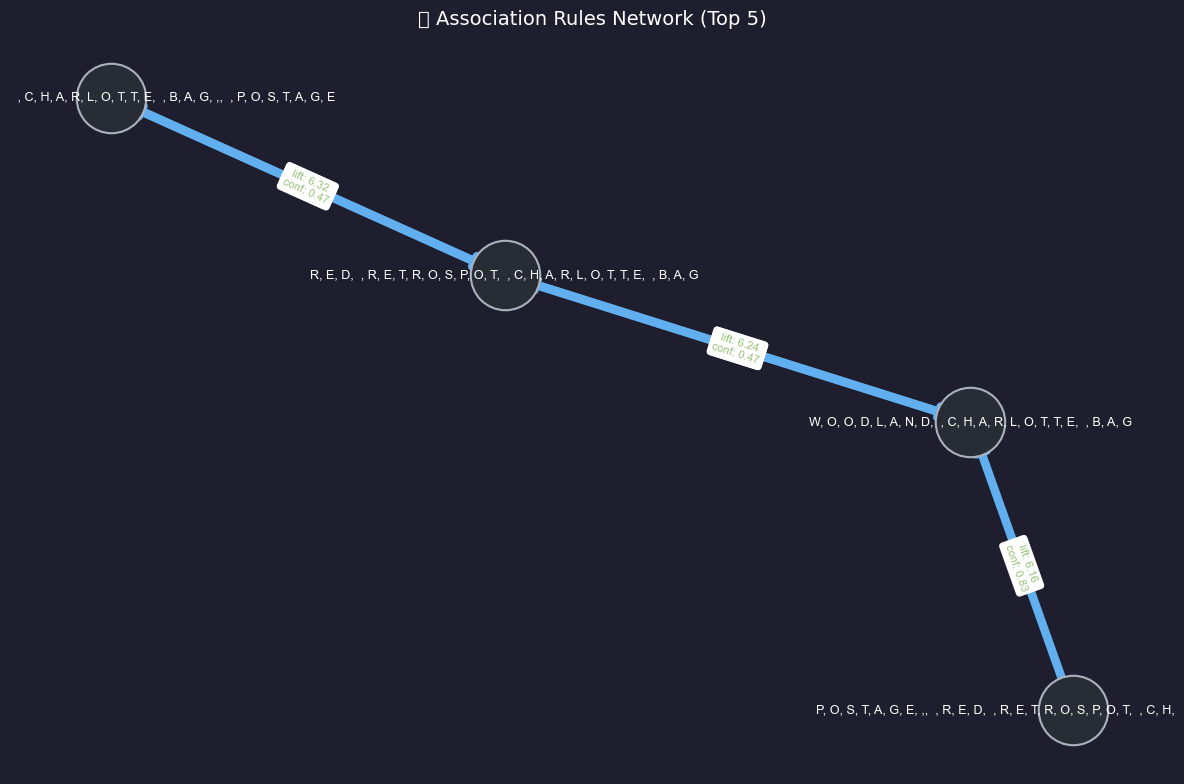

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Optional: Better font rendering
rcParams['font.family'] = 'DejaVu Sans'
rcParams['figure.dpi'] = 100

# Reformat sets to strings
rules_sorted['antecedents'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_sorted['consequents'] = rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

# Create graph
G = nx.DiGraph()

for _, row in rules_sorted.iterrows():
    G.add_edge(
        row['antecedents'],
        row['consequents'],
        weight=row['lift'],
        confidence=row['confidence'],
        support=row['support']
    )

# Node positions
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Colors and styles
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor("#1e1e2f")

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_color="#282c34", node_size=2500, edgecolors="#abb2bf", linewidths=1.5
)

# Draw edges with varying thickness based on lift
edges = G.edges(data=True)
edge_weights = [d['weight'] for (_, _, d) in edges]
nx.draw_networkx_edges(
    G, pos, edgelist=edges, width=[w for w in edge_weights],
    edge_color="#61afef", arrowstyle='-|>', arrowsize=20
)

# Draw labels
nx.draw_networkx_labels(
    G, pos,
    font_color='white',
    font_size=9
)

# Draw edge labels (optional: lift or confidence)
edge_labels = {(u, v): f"lift: {d['weight']:.2f}\nconf: {d['confidence']:.2f}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_size=8, font_color='#98c379'
)

plt.title("📊 Association Rules Network (Top 5)", fontsize=14, color="white")
plt.axis('off')
plt.tight_layout()
plt.show()



## Classification Models

To predict customer behavior, we implemented three classification algorithms: **Decision Tree**, **Naive Bayes**, and **K-Nearest Neighbors (KNN)**. The target variable was a binary indicator of high vs. low spenders, derived from total spending data. The dataset was split into a 70-30 train-test ratio, and performance was evaluated using accuracy, precision, recall, F1-score, and confusion matrices.



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [27]:
X = ml_df[['TotalSpend', 'Frequency', 'AvgQuantity']]
y = ml_df['HighSpender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standard Scaling
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.transform(X_train)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [33]:
# Inside your model evaluation loop:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

results_df = pd.DataFrame(results)
display(results_df.round(3))

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.000,1.000,1.000,1.000
1,Naive Bayes,0.872,0.988,0.749,0.852
2,KNN,0.990,0.997,0.983,0.990


## Clustering: Customer Segmentation
In this step, we segment customers into distinct groups using the K-Means clustering algorithm. We engineer relevant features like Total Spend, Purchase Frequency, and Average Quantity per Transaction, normalize them, and identify optimal clusters using the Elbow Method. The resulting clusters can help businesses target groups like Frequent Big Spenders or Occasional Low Spenders more effectively.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [37]:
# Standard Scaling 
X_cluster = ml_df[['TotalSpend', 'Frequency', 'AvgQuantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

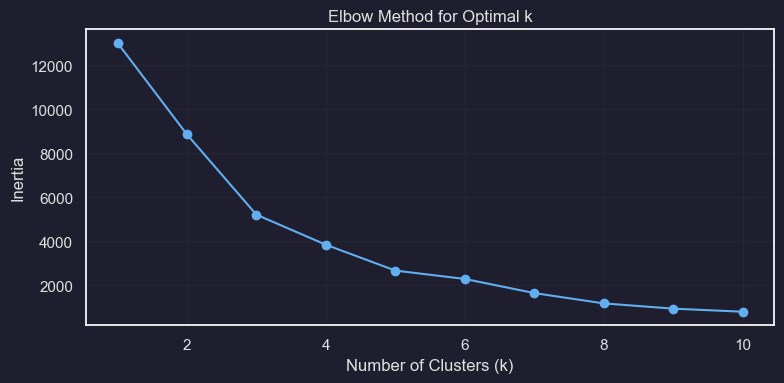

In [60]:
# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()
plt.show()


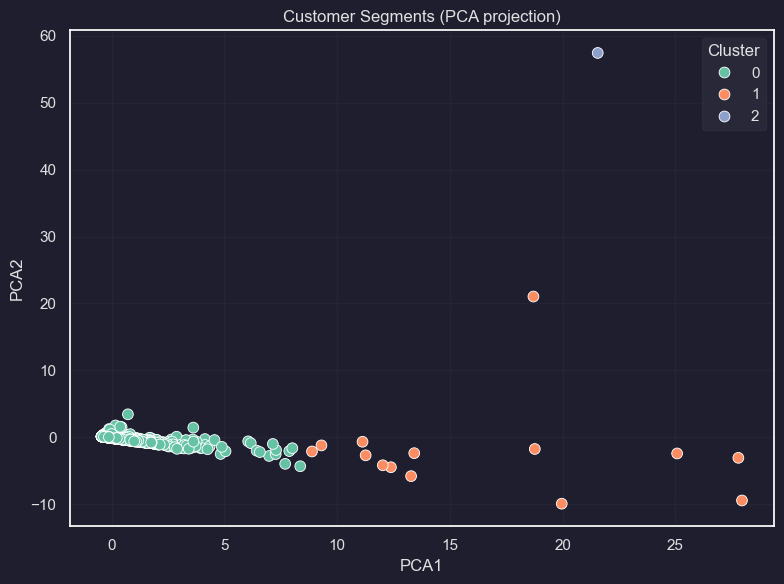

Silhouette Score: 0.96


In [61]:
# Fit KMeans
optimal_k =  3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
ml_df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualization using PCA ---
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
ml_df['PCA1'] = components[:, 0]
ml_df['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ml_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments (PCA projection)')
plt.tight_layout()
plt.show()

# Silhoutte Score
score = silhouette_score(X_scaled, ml_df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

## 📌 8. Insights & Business Recommendations

Based on our data analysis and modeling, we derive the following actionable insights for the business:

- **Bundling Products:**  
  Association Rule Mining revealed strong co-occurrence between specific product pairs (e.g., *Paper Craft Kits* and *Ribbon Set*). These items are often purchased together — introducing **bundle discounts** could increase cart sizes.

- **High Spenders Tend to Shop Midweek:**  
  Analysis of `HighSpender` behavior showed a peak in purchases around **Wednesdays and Thursdays**. A targeted **midweek loyalty campaign** can reinforce this spending behavior.

- **Cluster-Based Segmentation:**  
  K-Means clustering identified groups such as:
  - **Cluster 0**: Frequent low-spending customers — target for **upselling or bulk-buy promotions**.
  - **Cluster 1**: Infrequent but high-spending customers — ideal for **exclusive offers** or early access.
  - **Cluster 2**: Average in both frequency and spending — potential for **personalized nudges**.

- **Country-Based Tailoring:**  
  While UK dominated the dataset, countries like **Germany** and **France** showed distinct patterns — e.g., fewer but larger purchases. A **localized pricing or shipping strategy** might improve retention.

---

## ⚠️ 9. Challenges & Reflections

Working with real-world data presented several challenges:

- **Data Quality Issues**:  
  Duplicate rows and missing customer IDs needed to be cleaned. Some transactions had negative quantities (likely returns), which required filtering.

- **Sparse Matrix for Association Rules**:  
  One-hot encoded transaction matrix became large and memory-intensive, making rule mining computationally expensive.

- **Imbalanced Target Classes**:  
  For classification, the `HighSpender` target had a skewed distribution — we mitigated this using **median-based binarization** and carefully chosen metrics like F1-Score.

- **Memory Constraints**:  
  Operations like creating large pivot tables or calculating distances in high-dimensional space pushed the limits of available RAM. We handled this by aggregating data efficiently and applying PCA for dimensionality reduction.

---

## ✅ 10. Conclusion

This analysis provided an end-to-end pipeline from **data cleaning**, **EDA**, **feature engineering**, **modeling**, and finally **insight generation**. Through association rule mining, classification models, and clustering, we uncovered meaningful patterns in consumer behavior.

If implemented, the business can benefit from:
- **Product bundling strategies**
- **Targeted campaigns** based on customer type and spend behavior
- **Data-driven customer segmentation** for personalization

With further refinement and integration of external data (e.g., time of day, promotions), these strategies could be even more impactful.
